## Imports

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

## Constants

In [20]:
# 250 original images in each of the 5 classes
n_clusters = 250

# 5000 images for each of the 5 classes
n_total = 5000

# typical tran+val / test split is 80/20
test_size = 0.2

# number of experiments to run to calculate the mean and std of contamination proportion
n_experiments = 1000

## Single Test

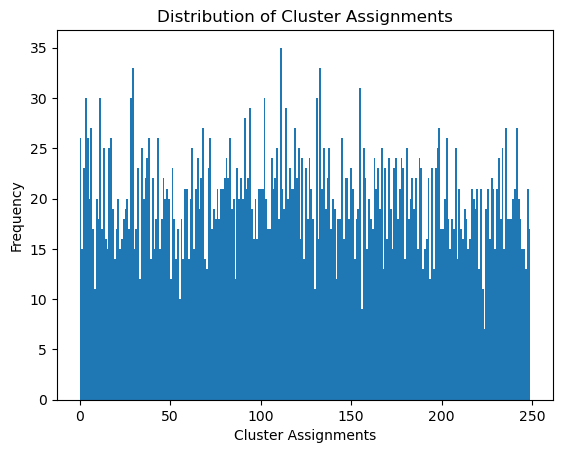

4000 1000
num_contamenated_clusters 242
proportion_contaminated 0.968


In [21]:
# set for reproducibility in this single test
np.random.seed(0)

# randomly assign each of the 5000 images to one of the 250 clusters (0, 1, ..., 249)
cluster_assignments = np.random.choice(a=n_clusters, size=n_total, replace=True)

plt.hist(cluster_assignments, bins=n_clusters)
plt.xlabel('Cluster Assignments')
plt.ylabel('Frequency')
plt.title('Distribution of Cluster Assignments')
plt.show()

train_val_set, test_set = train_test_split(cluster_assignments, test_size=test_size)
print(len(train_val_set), len(test_set))

num_contamenated_clusters = len(set(train_val_set).intersection(set(test_set)))
print("num_contamenated_clusters", num_contamenated_clusters)

proportion_contaminated = num_contamenated_clusters / n_clusters
print("proportion_contaminated", proportion_contaminated)

## Repeated Tests to Estimate the Mean and Standard Deviation of the Contamination Proportion

In [22]:
list_num_contaminated_clusters = []
list_proportion_contaminated_clusters = []

for i in range(n_experiments):
    cluster_assignments = np.random.choice(
        a=n_clusters, size=n_total, replace=True)

    train_val_set, test_set = train_test_split(
        cluster_assignments, test_size=test_size)
    
    num_contamenated_clusters = len(
        set(train_val_set).intersection(set(test_set)))
    list_num_contaminated_clusters.append(num_contamenated_clusters)

    proportion_contaminated = num_contamenated_clusters / n_clusters
    list_proportion_contaminated_clusters.append(proportion_contaminated)

print("Mean number of contaminated clusters: ", np.mean(list_num_contaminated_clusters))
print("Standard deviation of contaminated clusters: ", np.std(list_num_contaminated_clusters))
print()
print("Mean proportion of contaminated clusters: ",
      np.mean(list_proportion_contaminated_clusters))
print("Standard deviation of proportion of contaminated clusters: ",
      np.std(list_proportion_contaminated_clusters))

Mean number of contaminated clusters:  245.522
Standard deviation of contaminated clusters:  2.0345800549499153

Mean proportion of contaminated clusters:  0.982088
Standard deviation of proportion of contaminated clusters:  0.008138320219799667


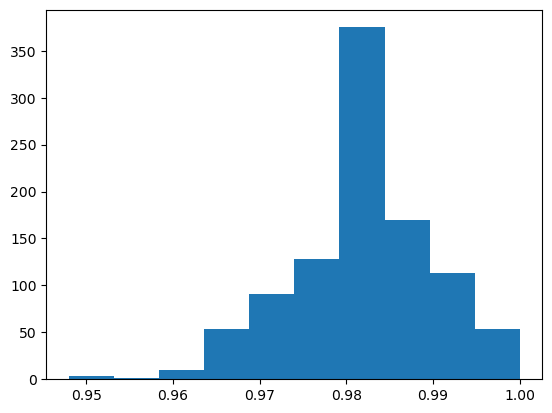

In [23]:
# Plotting distribution of number of contaminated clusters
plt.hist(list_proportion_contaminated_clusters)
plt.show()